In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets\covid(nivebayes).csv')

data


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))
X
Y
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred))

print("\nReport")
print(classification_report(Y_test,y_pred))

Accuracy: 0.8

Report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [6]:
# pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded
# X

In [7]:
y_pred_probs = model.predict_proba(X_test)
y_pred_probs = y_pred_probs[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, _= roc_curve(Y_test, y_pred_probs)

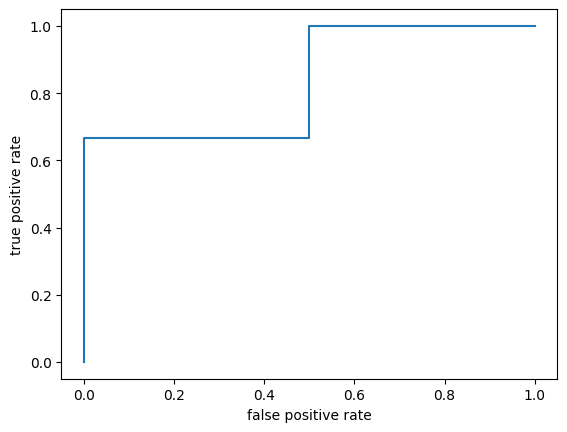

In [8]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()